In [ ]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

/home/aegis/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Loaded 77589 events from Period A


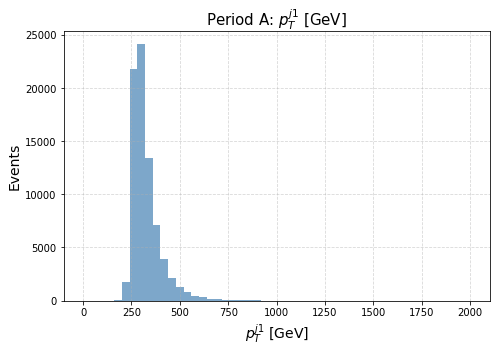

Saved plots/A/pT_j1.png


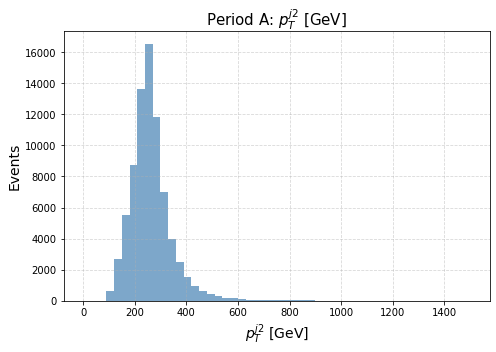

Saved plots/A/pT_j2.png


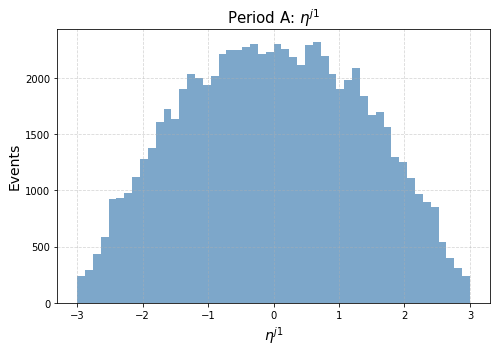

Saved plots/A/eta_j1.png


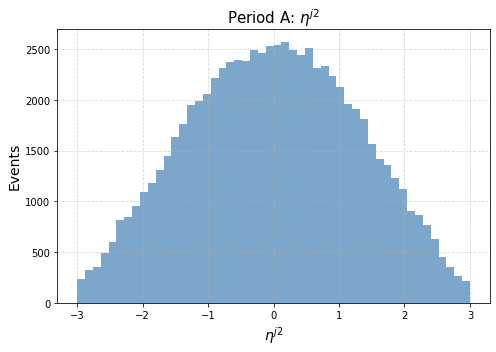

Saved plots/A/eta_j2.png


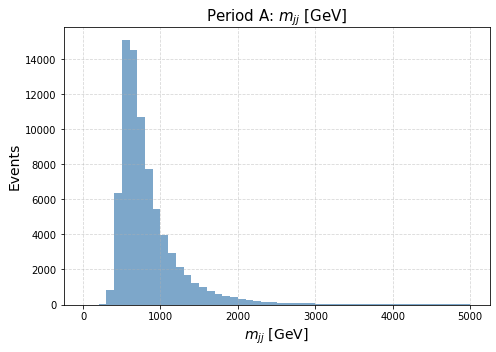

Saved plots/A/m_jj.png


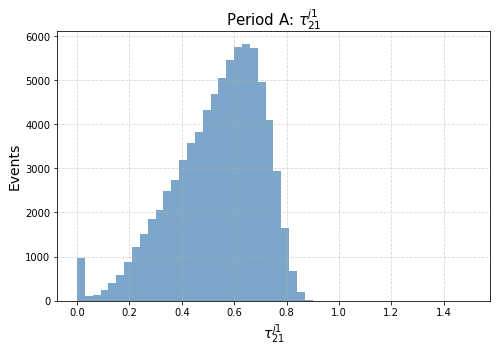

Saved plots/A/tau21_j1.png


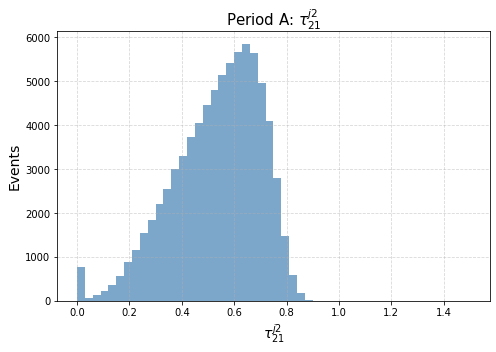

Saved plots/A/tau21_j2.png


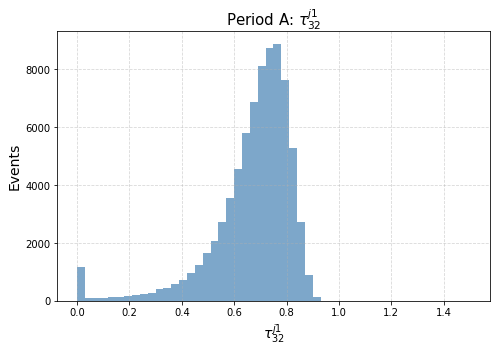

Saved plots/A/tau32_j1.png


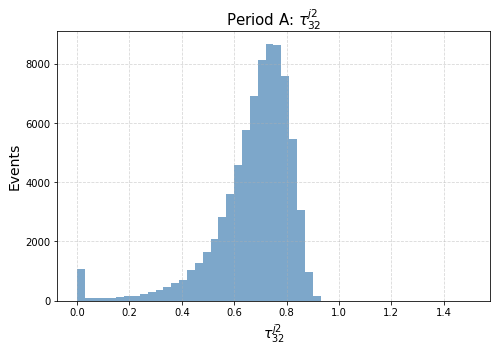

Saved plots/A/tau32_j2.png


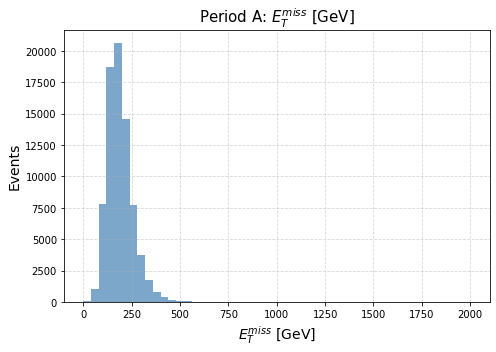

Saved plots/A/met.png


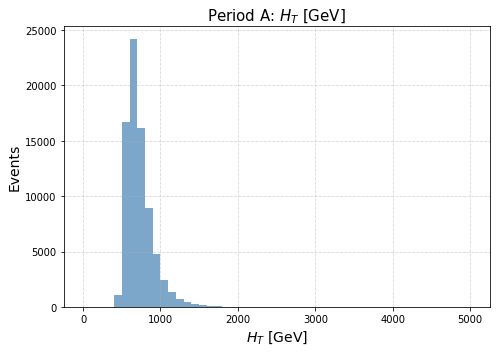

Saved plots/A/ht.png


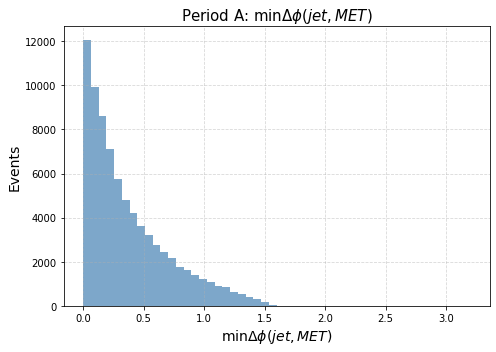

Saved plots/A/min_dPhi.png


In [3]:
# ------------------ PATHS ------------------
period = "A"
predataset_dir = f"Dataset_ver2/Data/predataset/{period}"
plot_dir = f"plots/{period}"
os.makedirs(plot_dir, exist_ok=True)

# ------------------ LOAD FILES ------------------
def load_period_data(predataset_dir):
    files = glob.glob(f"{predataset_dir}/**/dataset_*.txt", recursive=True)
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, delim_whitespace=True, comment="#")
            dfs.append(df)
        except Exception as e:
            print(f"Skipping {f}: {e}")
    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return pd.DataFrame()

data = load_period_data(predataset_dir)

if data.empty:
    print(f"No data files found for Period {period}")
    exit()

print(f"Loaded {len(data)} events from Period {period}")

# ------------------ PLOTTING ------------------
variables = {
    "pT_j1": (0, 2000, 50, r"$p_{T}^{j1}$ [GeV]"),
    "pT_j2": (0, 1500, 50, r"$p_{T}^{j2}$ [GeV]"),
    "eta_j1": (-3, 3, 50, r"$\eta^{j1}$"),
    "eta_j2": (-3, 3, 50, r"$\eta^{j2}$"),
    "m_jj": (0, 5000, 50, r"$m_{jj}$ [GeV]"),
    "tau21_j1": (0, 1.5, 50, r"$\tau_{21}^{j1}$"),
    "tau21_j2": (0, 1.5, 50, r"$\tau_{21}^{j2}$"),
    "tau32_j1": (0, 1.5, 50, r"$\tau_{32}^{j1}$"),
    "tau32_j2": (0, 1.5, 50, r"$\tau_{32}^{j2}$"),
    "met": (0, 2000, 50, r"$E_{T}^{miss}$ [GeV]"),
    "ht": (0, 5000, 50, r"$H_{T}$ [GeV]"),
    "min_dPhi": (0, 3.2, 50, r"$\min \Delta \phi(jet, MET)$"),
}

for var, (xmin, xmax, bins, xlabel) in variables.items():
    if var not in data.columns:
        print(f"Skipping {var}, not in dataset")
        continue

    plt.figure(figsize=(7, 5))
    plt.hist(data[var], bins=bins, range=(xmin, xmax), histtype="stepfilled", color="steelblue", alpha=0.7)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel("Events", fontsize=14)
    plt.title(f"Period {period}: {xlabel}", fontsize=15)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    outpath = os.path.join(plot_dir, f"{var}.png")
    plt.show()
    # plt.savefig(outpath)
    # plt.close()
    print(f"Saved {outpath}")

Loaded 66954 events from MC Diboson


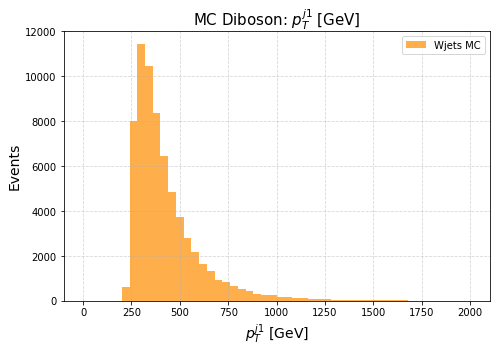

Saved plots/MC/Diboson/pT_j1.png


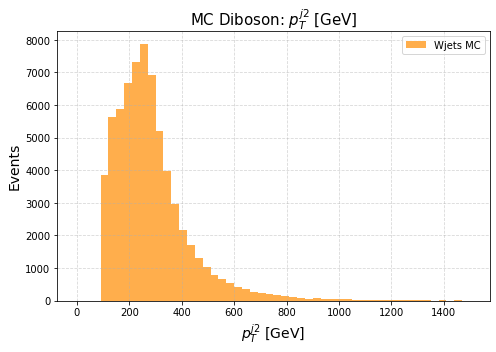

Saved plots/MC/Diboson/pT_j2.png


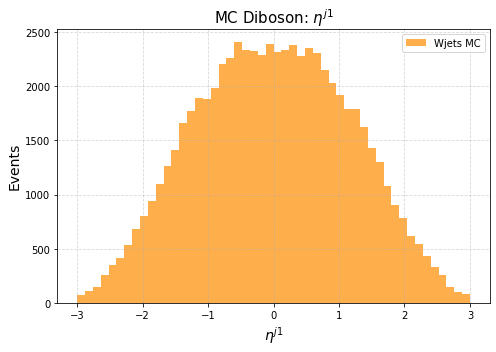

Saved plots/MC/Diboson/eta_j1.png


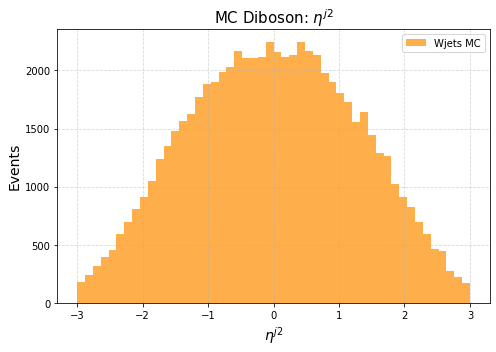

Saved plots/MC/Diboson/eta_j2.png


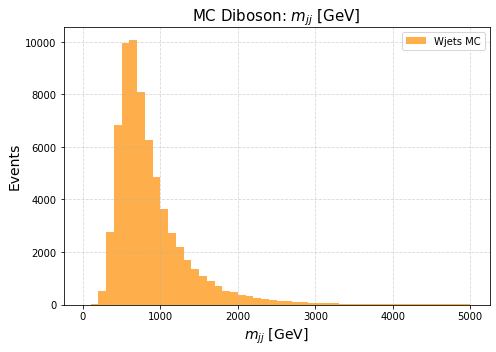

Saved plots/MC/Diboson/m_jj.png


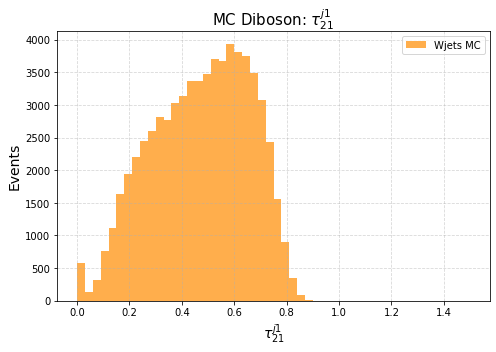

Saved plots/MC/Diboson/tau21_j1.png


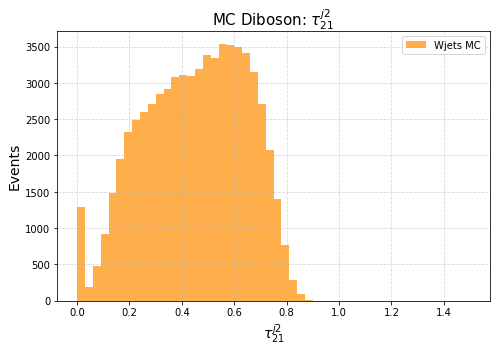

Saved plots/MC/Diboson/tau21_j2.png


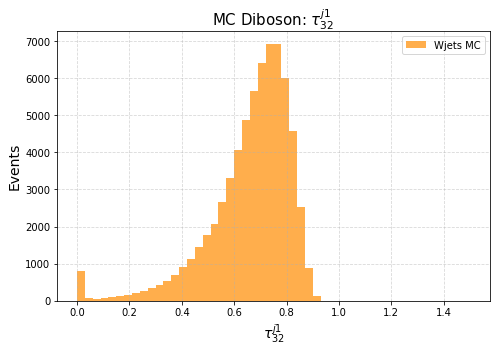

Saved plots/MC/Diboson/tau32_j1.png


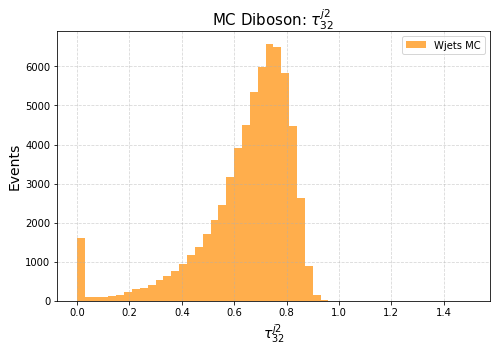

Saved plots/MC/Diboson/tau32_j2.png


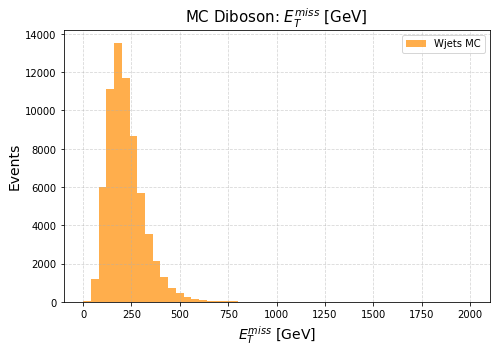

Saved plots/MC/Diboson/met.png


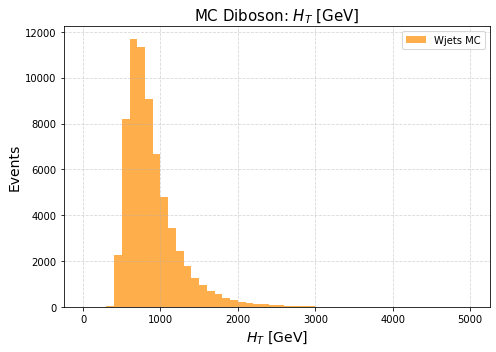

Saved plots/MC/Diboson/ht.png


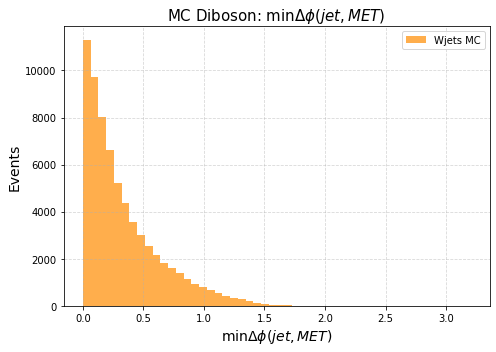

Saved plots/MC/Diboson/min_dPhi.png


In [5]:
# ------------------ PATHS ------------------
process = "Diboson"
predataset_dir = f"Dataset_ver2/MC/processed/{process}"
plot_dir = f"plots/MC/{process}"
os.makedirs(plot_dir, exist_ok=True)

# ------------------ LOAD FILES ------------------
def load_mc_data(predataset_dir):
    files = glob.glob(f"{predataset_dir}/**/dataset_*.txt", recursive=True)
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, delim_whitespace=True, comment="#")
            dfs.append(df)
        except Exception as e:
            print(f"Skipping {f}: {e}")
    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return pd.DataFrame()

data = load_mc_data(predataset_dir)

if data.empty:
    print(f"No Wjets MC files found in {predataset_dir}")
    exit()

print(f"Loaded {len(data)} events from MC {process}")

# ------------------ PLOTTING ------------------
variables = {
    "pT_j1": (0, 2000, 50, r"$p_{T}^{j1}$ [GeV]"),
    "pT_j2": (0, 1500, 50, r"$p_{T}^{j2}$ [GeV]"),
    "eta_j1": (-3, 3, 50, r"$\eta^{j1}$"),
    "eta_j2": (-3, 3, 50, r"$\eta^{j2}$"),
    "m_jj": (0, 5000, 50, r"$m_{jj}$ [GeV]"),
    "tau21_j1": (0, 1.5, 50, r"$\tau_{21}^{j1}$"),
    "tau21_j2": (0, 1.5, 50, r"$\tau_{21}^{j2}$"),
    "tau32_j1": (0, 1.5, 50, r"$\tau_{32}^{j1}$"),
    "tau32_j2": (0, 1.5, 50, r"$\tau_{32}^{j2}$"),
    "met": (0, 2000, 50, r"$E_{T}^{miss}$ [GeV]"),
    "ht": (0, 5000, 50, r"$H_{T}$ [GeV]"),
    "min_dPhi": (0, 3.2, 50, r"$\min \Delta \phi(jet, MET)$"),
}

for var, (xmin, xmax, bins, xlabel) in variables.items():
    if var not in data.columns:
        print(f"Skipping {var}, not in dataset")
        continue

    plt.figure(figsize=(7, 5))
    plt.hist(
        data[var],
        bins=bins,
        range=(xmin, xmax),
        histtype="stepfilled",
        color="darkorange",
        alpha=0.7,
        label="Wjets MC"
    )
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel("Events", fontsize=14)
    plt.title(f"MC {process}: {xlabel}", fontsize=15)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    outpath = os.path.join(plot_dir, f"{var}.png")
    plt.show()
    # plt.savefig(outpath)
    # plt.close()
    print(f"Saved {outpath}")